In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv("C:\\Users\\lap\\.vscode\\Urban Taxi Fair\\taxi_fare.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [ ]:
# feature engineering
# 1. Convert pickup and dropoff datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# 2. Adding new features to the df - Time-based features
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [ ]:
# 3.  Adding new feature to the df - Trip duration in minutes
df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])
    .dt.total_seconds() / 60
)

In [12]:
# haversine_distance function to calculate distance between two lat/lon points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2

    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [ ]:
# 4. Adding new feature to the df - Trip distance in kilometers
df['trip_distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour_of_day,day_of_week,is_weekend,trip_duration_min,trip_distance_km
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,0,1,0,7.916667,3.138096
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,0,1,0,11.100000,4.303331
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,0,1,0,31.100000,16.600142
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,0,1,0,0.000000,9.046547
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,0,1,0,0.000000,20.400022


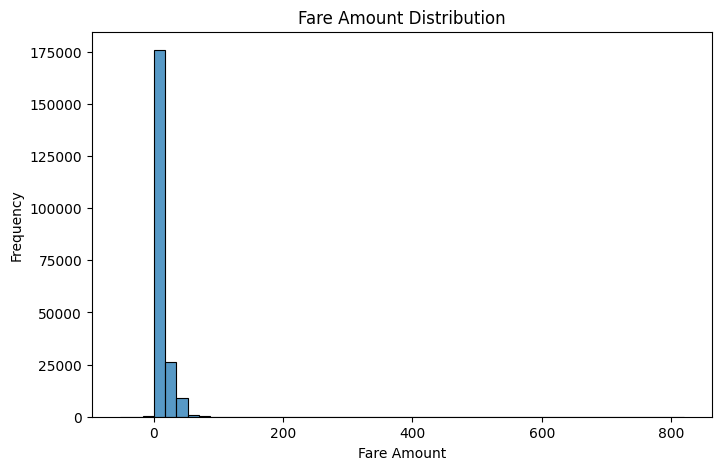

In [20]:
# Explotry data Analysis and Outlier detection steps.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize fare_amount distribution
plt.figure(figsize=(8, 5),)
sns.histplot(df['fare_amount'], bins=50)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


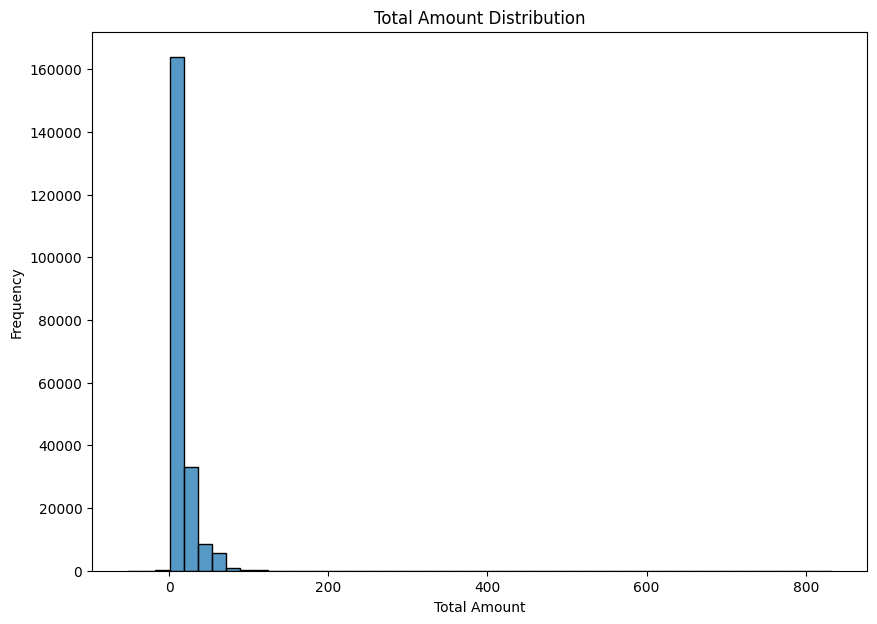

In [22]:
# Visualize total_amount distribution
plt.figure(figsize=(10, 7),)
sns.histplot(df['total_amount'], bins=50)
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

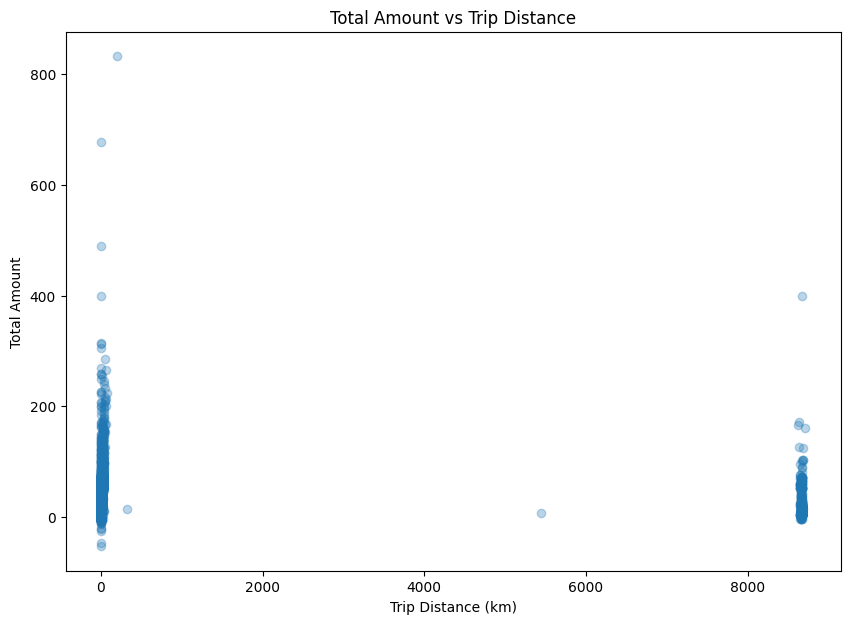

In [ ]:
# Analysis the relationship between trip_distance_km and total_amount
plt.figure(figsize=(10, 7))
plt.scatter(df['trip_distance_km'], df['total_amount'], alpha=0.3)
plt.xlabel("Trip Distance (km)")
plt.ylabel("Total Amount")
plt.title("Total Amount vs Trip Distance")
plt.show()

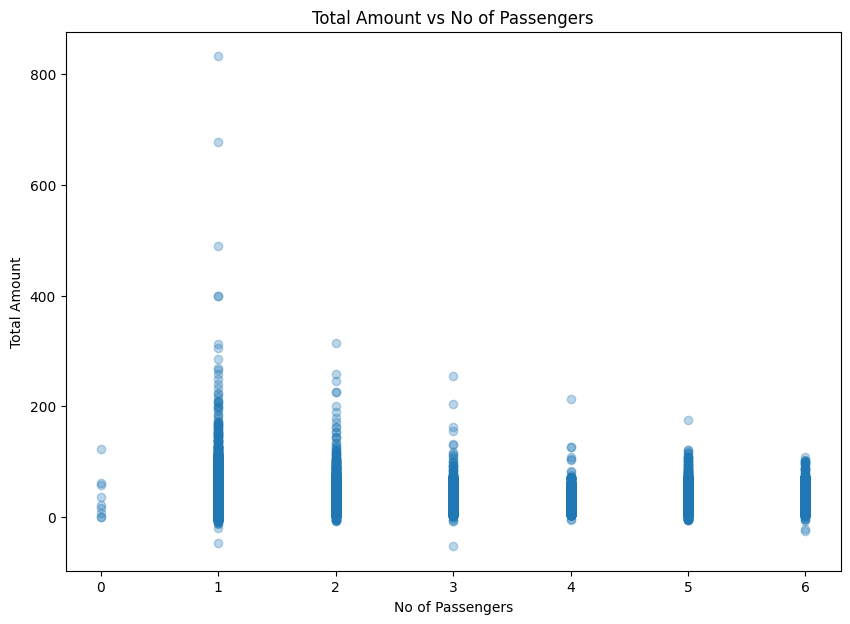

In [25]:
# Analysis on Total Amount vs No of Passengers
plt.figure(figsize=(10,7))
plt.scatter(df['passenger_count'], df['total_amount'], alpha=0.3)
plt.xlabel("No of Passengers")
plt.ylabel("Total Amount")
plt.title("Total Amount vs No of Passengers")
plt.show()

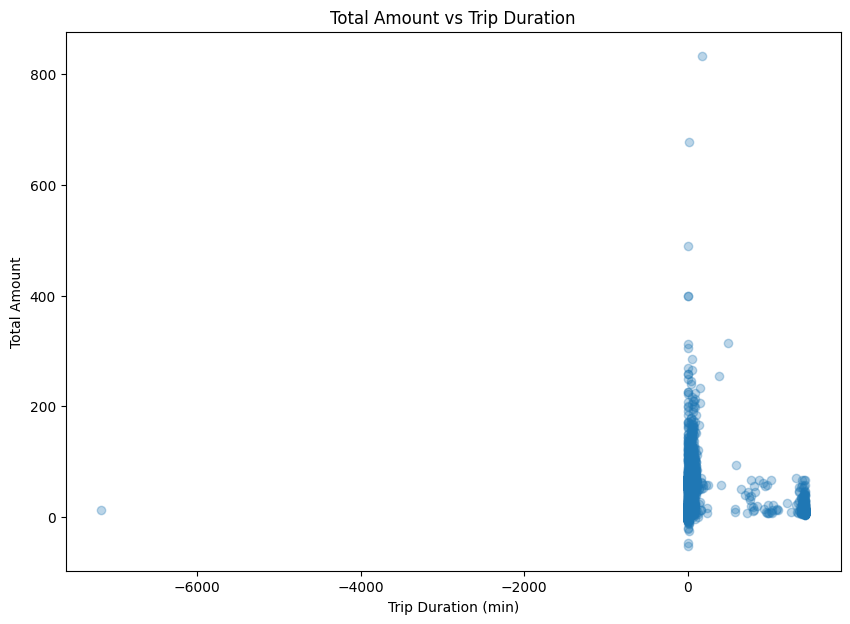

In [26]:
# Analysis on Total Amount vs trip_duration_min
plt.figure(figsize=(10,7))
plt.scatter(df['trip_duration_min'], df['total_amount'], alpha=0.3)
plt.xlabel("Trip Duration (min)")
plt.ylabel("Total Amount")
plt.title("Total Amount vs Trip Duration")
plt.show()

In [27]:
# Selecting relevant features for modeling
df_model = df[
    [
        'trip_distance_km',
        'trip_duration_min',
        'passenger_count',
        'hour_of_day',
        'day_of_week',
        'is_weekend',
        'RatecodeID',
        'payment_type',
        'total_amount'
    ]
]

In [ ]:
## Handling outliers in df_model
df_model = df_model[
    (df_model['trip_duration_min'] >= 1) & (df_model['trip_duration_min'] <= 300) &
    (df_model['trip_distance_km'] >= 0.1) & (df_model['trip_distance_km'] <= 200) &
    (df_model['total_amount'] >= 2.5) & (df_model['total_amount'] <= 500) &
    (df_model['passenger_count'] >= 1) & (df_model['passenger_count'] <= 6)
]

In [29]:
# Apply IQR method to handle outliers in 'total_amount','trip_duration_min','trip_distance_km'
def apply_iqr(df_model, column):
    Q1 = df_model[column].quantile(0.25)
    Q3 = df_model[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df_model[
        (df_model[column] >= lower) &
        (df_model[column] <= upper)
    ]
for col in ['trip_distance_km', 'trip_duration_min', 'total_amount']:
    df_model = apply_iqr(df_model, col)

In [30]:
# checking the skewness of the features
df_model[['total_amount', 'trip_distance_km', 'trip_duration_min', 'passenger_count','hour_of_day', 'day_of_week','is_weekend',
          'payment_type', 'RatecodeID']].skew()

total_amount           0.753493
trip_distance_km       1.265707
trip_duration_min      0.731041
passenger_count        1.884454
hour_of_day           -0.861035
day_of_week            0.479084
is_weekend             0.000000
payment_type           0.812166
RatecodeID           413.171394
dtype: float64

In [31]:
# Applying log transformation to reduce skewness
df_model['log_trip_distance'] = np.log1p(df_model['trip_distance_km'])
df_model['log_trip_duration'] = np.log1p(df_model['trip_duration_min'])
df_model['log_total_amount'] = np.log1p(df_model['total_amount'])

In [32]:
# checking the skewness of the features after log transformation
df_model[['log_total_amount', 'log_trip_distance', 'log_trip_duration', 'passenger_count','hour_of_day', 'day_of_week','is_weekend',
          'payment_type', 'RatecodeID']].skew()

log_total_amount       0.063226
log_trip_distance      0.400135
log_trip_duration     -0.326500
passenger_count        1.884454
hour_of_day           -0.861035
day_of_week            0.479084
is_weekend             0.000000
payment_type           0.812166
RatecodeID           413.171394
dtype: float64

In [33]:
# final feature for modeling X values
final_features = [
    'log_trip_distance',
    'log_trip_duration',
    'hour_of_day',
    'day_of_week',
    'is_weekend',
    'passenger_count',
    'RatecodeID',
    'payment_type'
]

In [ ]:
# One-hot encoding for categorical variables and defining X and y
X = pd.get_dummies(
    df_model[final_features],
    columns=['RatecodeID', 'payment_type'],
    drop_first=True
)

y = df_model['total_amount']        # OR df_model['log_total_amount']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [36]:
# X train and X Test scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
# ridge_model =  ridge_regression.Ridge(alpha=1.0)
# ridge_model.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [38]:
# model Evaluations
y_pred = ridge_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Mean Absolute Error (MAE): 1.1603723911172354
Mean Squared Error (MSE): 2.3950431634764375
Root Mean Squared Error (RMSE): 1.5475926994776235
R-squared (R2 ): 0.8852343287322912


In [39]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_ridge_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
y_pred_best = best_ridge_model.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Mean Absolute Error (MAE) after tuning: {mae_best}")
print(f"Mean Squared Error (MSE) after tuning: {mse_best}")
print(f"Root Mean Squared Error (RMSE) after tuning: {rmse_best}")
print(f"R-squared (R2 ) after tuning: {r2_best}")


Best Hyperparameters: {'alpha': 10.0, 'solver': 'sparse_cg'}
Mean Absolute Error (MAE) after tuning: 1.1603613988142674
Mean Squared Error (MSE) after tuning: 2.39503052219139
Root Mean Squared Error (RMSE) after tuning: 1.5475886152952243
R-squared (R2 ) after tuning: 0.885234934477351


In [40]:
import joblib

In [41]:
# dump best ridge model
joblib.dump(best_ridge_model, 'ridge_regression_model.pkl')

['ridge_regression_model.pkl']

In [3]:
from sklearn.linear_model import Lasso


In [5]:
# fit Lasso Model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [1]:
# Lasso model Evaluations
y_pred = lasso_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

NameError: name 'lasso_model' is not defined

In [46]:
# dump Lasso model
joblib.dump(lasso_model, 'lasso_regression_model.pkl')

['lasso_regression_model.pkl']